In [1]:
import pandas as pd
from map_boxes import mean_average_precision_for_boxes
from tqdm import tqdm

Couldn't import fast version of function compute_overlap, will use slow one. Check cython intallation


In [2]:
save_f = 'test_ep10_pretrain_aug_clean_not_erode'
ann = pd.read_csv('./model/%s/dev_%d_label.csv'%(save_f, 0))
det = pd.read_csv('./model/%s/dev_%d.csv'%(save_f, 0))

In [3]:
ids = list(set(list(ann.ImageID)))

In [4]:
cache = {}
for _ in tqdm(ids):
    mean_ap, average_precisions = mean_average_precision_for_boxes(ann[ann.ImageID==_], det[det.ImageID==_], iou_threshold=0.5, verbose=False)
    if mean_ap!=1.0:
        cache[_] = mean_ap

100%|██████████| 25873/25873 [03:10<00:00, 136.11it/s]


In [7]:
import json

In [8]:
with open('./data/error.json','w',encoding='utf-8') as f:
    f.write(json.dumps(cache, ensure_ascii=False))

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
plt.rcParams['figure.figsize'] = (20.0, 16.0) 
def show(path):
    img = cv2.imread(path)
    plt.imshow(img)

In [24]:
ids_error = [_ for _ in cache.keys()]

In [25]:
ids_error[0]

'./data/images/pdf/51872_368.png'

In [29]:
name = ids_error[1].split('/')[-1].split('.')[0]+'.jpg'

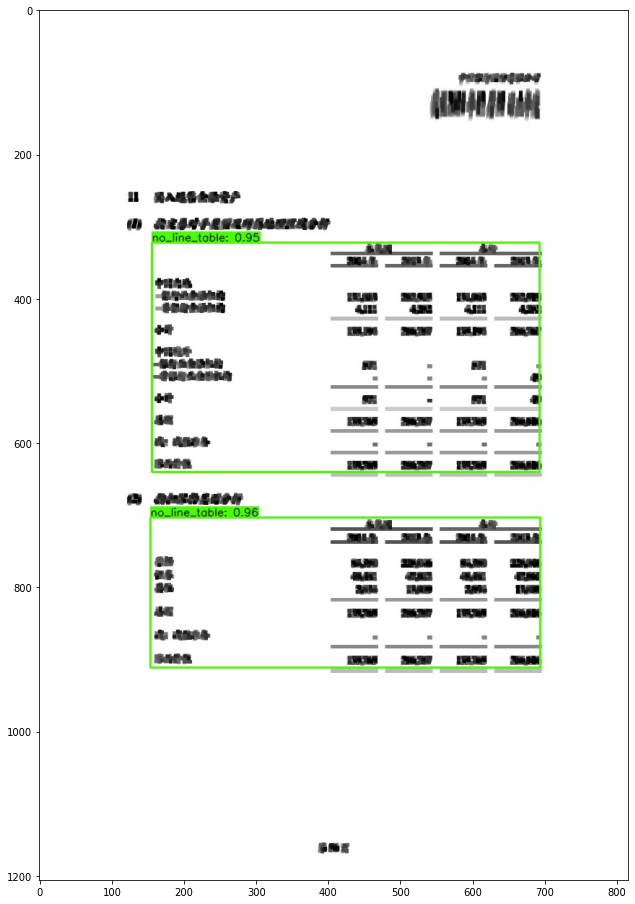

In [30]:
show('./predict/185_226/%s'%name)

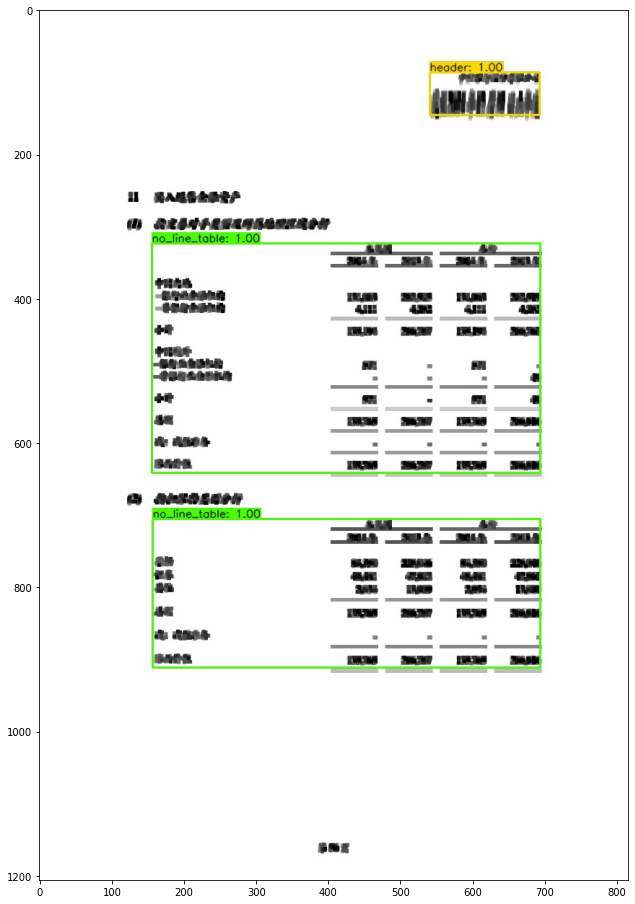

In [31]:
show('./predict/185_226_v/%s'%name.replace('jpg','png_.jpg'))